# Density Based Spacial Clustering of Applications with Noise

DBSCAN is a clustering algorithm that is common with data mining and machine learning. It takes the euclidean distance between points and designated points that are in low density regions as outliers. 

### When To Use
* Can be used to find structures and associations
* Can handle datasets with noise elements
* Does not need the user to define number of clusters
* Can cluster on any aribitrary sized or shaped cluster
* This algorithm can be useful when a dataset is very large and complex. In exchange for lost data, the algorithm that will used the compressed data to compute faster
* Handles non-linear data effeciently
* Preserves local and global structures
<br>

### How Does it Work
* The algorithm starts at an arbitrary point and all points within the epsilon radius is measured
* If the points measured within the radius fufills the minimum density, the first point will be considered as the start of a new cluster. Otherwise, the point is considered as noise. The point is now visited
* Starting from the first point in a cluster, all points wihtin its radius are considered to belong to the cluster. Then a next point will be chosen and the process is repeated until it fails to fufill the clustering requirements
* After the clustering process finished, the algorithm goes to a unvisted point and repeats the process until all points are either noise or marked as visited
<br>

### Params
* eps: the distance between points to be considered as belonging to the same cluster
    * A small eps will causes clustering to fall short because the distance may not be considered dense enough for a cluster. A large eps will cause clusters to merge together and can cause data noise to leak
* minPoints: the number of points required to consider a region as dense
    * Generally, minimum points should be usally equal to the dimension of the data plus one : D+1. Data sets with large amounts of noise may cause significant clusters. Ususally, larger the dataset, the larger the minPoints. 
<br>

### Results 
* The algorithm will generate clusters based on the above params
<br>

### Limitations
* Struggles to handle data with varying density
* Higher Dimensional Data often leads to large distances which limits clustering
* Hyperparameter tuning

### Sources
Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, №34, pp. 226–231).


In [162]:
#Imports
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

## Attempt 1: Aribtrary Shaped Clusters

In [163]:
#Creating an Example Data Set

random.seed(0)

#4 distinct clusters

#Cluster 1 is a region of tight points
cluster_1 = -10 * np.random.rand(100,2) 

#Cluster 2 is the function f(x) = -.01x^2 + .5x + sin(x)+15 where 0 <= x <= 100
cluster_2 = []
for i in range(100):
    random_y = -.01*i**2 +.5 * i + np.sin(i) + 15 
    cluster_2.append([i, random_y])
cluster_2 = np.array(cluster_2)

#Cluster 3 is the function f(x) = -x+50 + .01*x^2 where -45<= x <= 55
cluster_3 = []
for i in range(100):
    x = i - 45
    random_y = -1*x + 50 + .02*x**2  
    cluster_3.append([i, random_y])
cluster_3 = np.array(cluster_3)

#Cluster 4 is a circle defined by (x-60)^2 + (y+25)^2 = 100
cluster_4 = []
for i in range(50):
    x = .4*i +50
    random_y_pos = (100-(x-60)**2)**.5 -25 
    random_y_neg = -1* (100-(x-60)**2)**.5 -25 
    cluster_4.append([x, random_y_pos])
    cluster_4.append([x, random_y_neg])
cluster_4 = np.array(cluster_4)

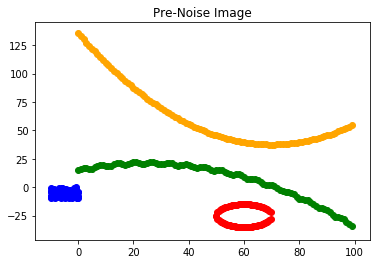

In [164]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [165]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 2
x_noise = np.random.normal(0,2,100)
y_noise = np.random.normal(0,2,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


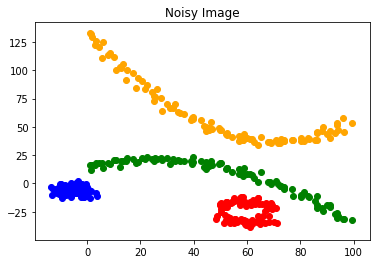

In [166]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [167]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [168]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

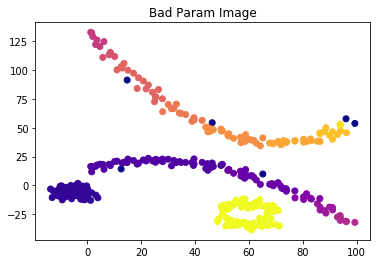

In [169]:
# Bad Param Example
EPS = .123
MIN_SAMPLES = 2

dbscan = DBSCAN(eps=EPS, min_samples = MIN_SAMPLES)
clusters = dbscan.fit_predict(data_scaled)

#Image
fig, ax = plt.subplots()
ax.set_title("Bad Param Image")
plt.scatter(noisy_data_array[:, 0], noisy_data_array[:, 1], c=clusters, cmap="plasma")
plt.show()

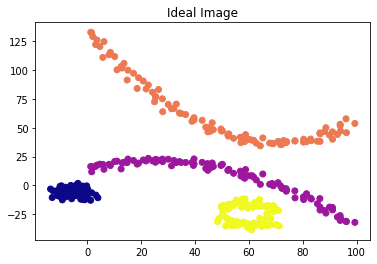

In [170]:
# Ideal Param setup
EPS = .25
MIN_SAMPLES = 3

dbscan = DBSCAN(eps=EPS, min_samples = MIN_SAMPLES)
clusters = dbscan.fit_predict(data_scaled)

#Image
fig, ax = plt.subplots()
ax.set_title("Ideal Image")
plt.scatter(noisy_data_array[:, 0], noisy_data_array[:, 1], c=clusters, cmap="plasma")
plt.show()

## Attempt 2: Globular Based Clusters

In [179]:
#Creating the Data Set

#4 distinct clusters
cluster_1 = -2 * np.random.rand(100,2)
cluster_2 =  2 * np.random.rand(100,2)
cluster_3 = -1 * np.random.rand(100,2)
cluster_4 =1 + 3 * np.random.rand(100,2)

#offsetting
cluster_1 = np.array([[i[0]-5, i[1]-5] for i in cluster_1])
cluster_2 = np.array([[i[0]+5, i[1]-5] for i in cluster_2])
cluster_3 = np.array([[i[0]-5, i[1]+5] for i in cluster_3])
cluster_4 = np.array([[i[0]+3, i[1]+5] for i in cluster_4])

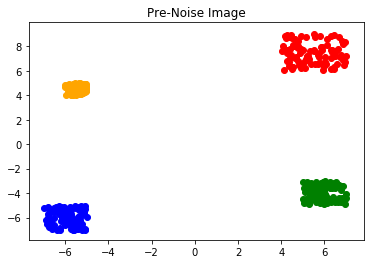

In [180]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [181]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 1
x_noise = np.random.normal(0,1,100)
y_noise = np.random.normal(0,1,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


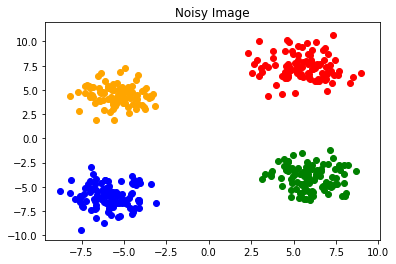

In [182]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [183]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [184]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

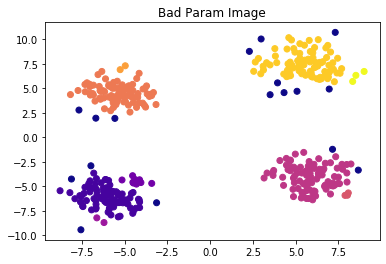

In [188]:
# Bad Param Example
EPS = .125
MIN_SAMPLES = 2

dbscan = DBSCAN(eps=EPS, min_samples = MIN_SAMPLES)
clusters = dbscan.fit_predict(data_scaled)

#Image
fig, ax = plt.subplots()
ax.set_title("Bad Param Image")
plt.scatter(noisy_data_array[:, 0], noisy_data_array[:, 1], c=clusters, cmap="plasma")
plt.show()

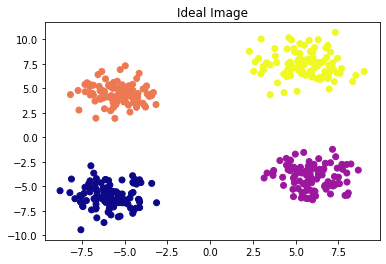

In [189]:
# Ideal Param setup
EPS = .3
MIN_SAMPLES = 3

dbscan = DBSCAN(eps=EPS, min_samples = MIN_SAMPLES)
clusters = dbscan.fit_predict(data_scaled)

#Image
fig, ax = plt.subplots()
ax.set_title("Ideal Image")
plt.scatter(noisy_data_array[:, 0], noisy_data_array[:, 1], c=clusters, cmap="plasma")
plt.show()